# Case: Consórcio (Classificação)
> Totorial de como utilizar regressão logística com a biblioteca statsmodels.

- toc: false
- badges: true
- comments: true
- categories: [logistica, classificacao, consorcio]
- image:

**Suponha que uma instituição financeira deseja estimar a probabilidade de um cliente contratou um consórcio de
automóvel, p=P(Y=1). Variável resposta: 1 – contratou o consórcio e 0 – não contratou o consórcio.**

In [68]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [4]:
df = pd.read_excel("/content/Consorcio.xlsx", sheet_name="BASE DE DADOS")
df.head()

,Contratou,DI,Financiamento,Poupança,Salário,CC
0,1,29537.631,4923797.68,648.681,90943.36,5390.57232
1,1,196755.372,4006518.12,2208.237,81735.48,4632.16404
2,1,120872.580,3583136.88,7747.857,85892.78,5808.66874
3,1,215312.000,3516259.70,5583.999,3770.16,3622.61240
4,1,738038.139,3248257.80,67986.180,1317.92,9560.52240


**(a) Faça a análise exploratória univariada e interprete todas as variáveis do banco de dados.**

In [5]:
#Análise univariada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Contratou      89 non-null     int64  
 1   DI             89 non-null     float64
 2   Financiamento  89 non-null     float64
 3   Poupança       89 non-null     float64
 4   Salário        89 non-null     float64
 5   CC             89 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.3 KB


In [6]:
df.describe()

,Contratou,DI,Financiamento,Poupança,Salário,CC
count,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000
mean,0.550562,301413.789549,1.228615e+06,19774.266045,34354.889438,5702.393457
std,0.500255,249528.494442,1.018172e+06,31623.011024,29305.261298,4589.353601
min,0.000000,3090.153000,5.838863e+04,36.369000,1200.000000,268.135840
25%,0.000000,127720.800000,5.508031e+05,1287.098000,11200.550000,2278.598980
50%,1.000000,203243.200000,8.395141e+05,3757.220000,22284.610000,4632.164040
75%,1.000000,464022.591000,1.688979e+06,23705.380000,58565.010000,8781.163580
max,1.000000,897239.700000,4.923798e+06,138717.280000,90943.360000,23213.995200


**Faça a análise bivariada das variáveis explicativas (covariáveis) vs. a variável resposta. Você acredita que:**

1. O Valor Investido no Fundo DI (variável DI) é menor, em geral, para quem contratou consórcio?
2. O Valor do Financiamento Imobiliário (variável Financiamento) é maior, em geral, para quem contratou consórcio?
3. O Valor Aplicado na Poupança (variável Poupança) é maior, em geral, para quem contratou consórcio?
4. O Salário do Cliente (variável Salário) é maior, em geral, para quem contratou consórcio?
5. O Gasto no Cartão de Crédito (variável CC) é menor, em geral, para quem contratou consórcio?

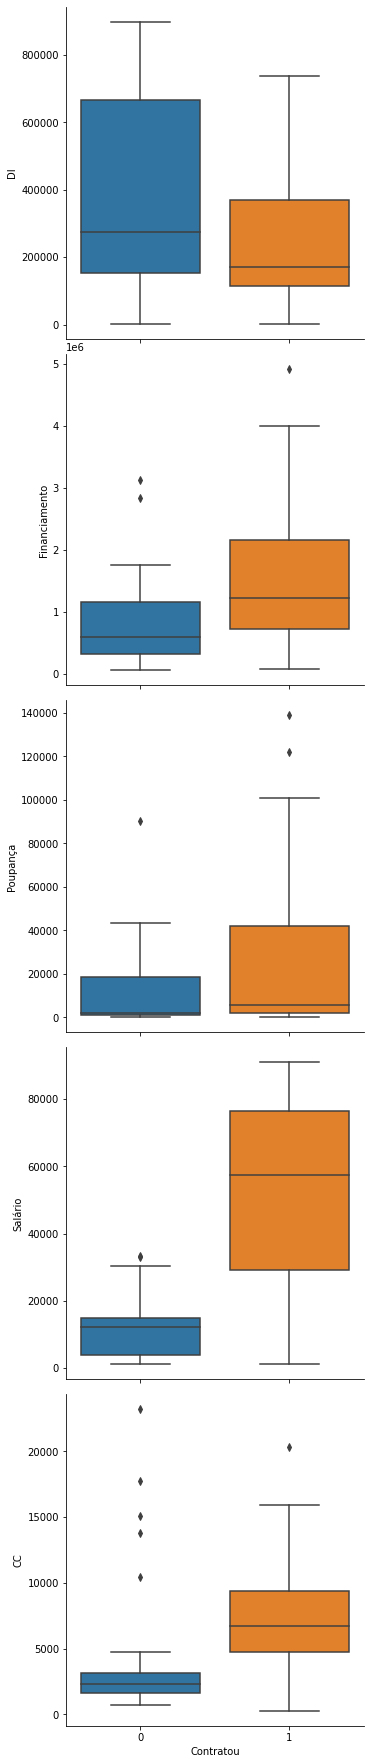

In [14]:
#Análise Bivariada
g = sns.PairGrid(data=df,
             x_vars='Contratou',
             y_vars=['DI','Financiamento','Poupança','Salário', 'CC'],
             height=5)

g.map(sns.boxplot, )

**O Valor Investido no Fundo DI (variável DI) é menor, em geral, para quem contratou consórcio?** Sim


**O Valor do Financiamento Imobiliário (variável Financiamento) é maior, em geral, para quem contratou consórcio?** Sim


**O Valor Aplicado na Poupança (variável Poupança) é maior, em geral, para quem contratou consórcio?** Sim


**O Salário do Cliente (variável Salário) é maior, em geral, para quem contratou consórcio?** Sim


**O Gasto no Cartão de Crédito (variável CC) é menor, em geral, para quem contratou consórcio?** Sim

**(c) Obtenha o modelo de regressão logística utilizando 90% de confiança.**

In [50]:
log_reg = sm.logit("Contratou ~ DI + Financiamento + Poupança + Salário + CC",
                   data = df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.218736
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Contratou   No. Observations:                   89
Model:                          Logit   Df Residuals:                       83
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.6821
Time:                        19:19:06   Log-Likelihood:                -19.467
converged:                       True   LL-Null:                       -61.234
Covariance Type:            nonrobust   LLR p-value:                 1.528e-16
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.4499      1.352     -2.552      0.011      -6.099      -0.800
DI            -4.269

Como podemos perceber a variável CC não tem a garantia que ela será boa para realizarmos o modelo, portanto iremos retira-la.

In [51]:
log_reg = sm.logit("Contratou ~ DI + Financiamento + Poupança + Salário",
                   data = df).fit()
print(print(log_reg.summary()))

Optimization terminated successfully.
         Current function value: 0.221020
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Contratou   No. Observations:                   89
Model:                          Logit   Df Residuals:                       84
Method:                           MLE   Df Model:                            4
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.6788
Time:                        19:19:13   Log-Likelihood:                -19.671
converged:                       True   LL-Null:                       -61.234
Covariance Type:            nonrobust   LLR p-value:                 3.787e-17
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.9477      1.075     -2.741      0.006      -5.055      -0.840
DI            -4.835

Iremos realizar o mesmo procedimento com a variável Financiamento.

In [52]:
log_reg = sm.logit("Contratou ~ DI + Poupança + Salário",
                   data = df).fit()
print(print(log_reg.summary()))

Optimization terminated successfully.
         Current function value: 0.229640
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Contratou   No. Observations:                   89
Model:                          Logit   Df Residuals:                       85
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.6662
Time:                        19:20:07   Log-Likelihood:                -20.438
converged:                       True   LL-Null:                       -61.234
Covariance Type:            nonrobust   LLR p-value:                 1.398e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3707      0.878     -2.701      0.007      -4.091      -0.651
DI         -4.758e-06   2.22e

**(d) Obtenha a probabilidade estimada.**

In [56]:
x = [i for i in df.columns if i != 'Contratou']
df['contrata_prob'] = log_reg.predict(df[x])
df.head()

,Contratou,DI,Financiamento,Poupança,Salário,CC,contrata_prob
0,1,29537.631,4923797.68,648.681,90943.36,5390.57232,0.998866
1,1,196755.372,4006518.12,2208.237,81735.48,4632.16404,0.994298
2,1,120872.580,3583136.88,7747.857,85892.78,5808.66874,0.998243
3,1,215312.000,3516259.70,5583.999,3770.16,3622.61240,0.068427
4,1,738038.139,3248257.80,67986.180,1317.92,9560.52240,0.295636


**(e) Obtenha a tabela de classificação.**

In [74]:
#Criando um ponto de corte igual a média da variável Contratou

df['contrata_pred'] = [ 1 if i >= 0.50 else 0 for i in df.contrata_prob ]
df.head()

,Contratou,DI,Financiamento,Poupança,Salário,CC,contrata_prob,contrata_pred
0,1,29537.631,4923797.68,648.681,90943.36,5390.57232,0.998866,1
1,1,196755.372,4006518.12,2208.237,81735.48,4632.16404,0.994298,1
2,1,120872.580,3583136.88,7747.857,85892.78,5808.66874,0.998243,1
3,1,215312.000,3516259.70,5583.999,3770.16,3622.61240,0.068427,0
4,1,738038.139,3248257.80,67986.180,1317.92,9560.52240,0.295636,0


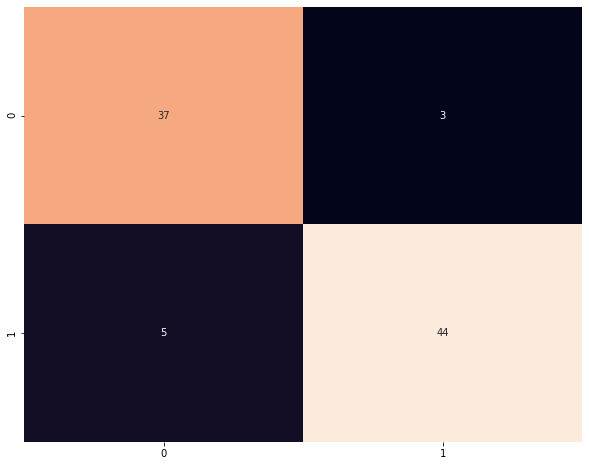

In [90]:
#Matrix de confusão

cm1 = confusion_matrix(df.Contratou, df.contrata_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm1, annot = True, fmt='d', cbar=False)

In [89]:
print("Acurácia: %.2f" % (accuracy_score(df.Contratou, df.contrata_pred)*100),'%')
print('Especificidade: %.2f' % (cm1[0,0]*100/(cm1[0,0]+ cm1[0,1])),'%')
print('Sensibilidade: %.2f' % (cm1[1,1]*100/(cm1[1,0]+ cm1[1,1])),'%')

Acurácia: 91.01 %
Especificidade: 92.50 %
Sensibilidade: 89.80 %


> Uma acurácia de 91% indica de a cada 100 clientes o modelo irá acertar 91 casos.

> Uma sensibilidade de 89% mostra a capacidade do modelo de acertar os clientes que iriam contratar o consórcio.

> A especificidade de 92% indica a eficácia em identificar os clientes que não irão contratar o consórcio.